# NumPy Tutorial
![NumPy logo](https://www.numpy.org/_static/numpy_logo.png)

*Author: Fabio Hernandez*

*Last updated: 2020-02-14*

*Location:* https://github.com/airnandez/numpandas

<a href="https://colab.research.google.com/github/airnandez/numpandas/blob/master/notebooks/NumPy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

--------------------
## Introduction

This is a short tutorial for helping you getting familiar with the NumPy library. NumPy is written in C and Python and has its origins back in 2005. It is at the heart of several scientific libraries of the Python ecosystem, such as Pandas, SciPy, etc.

This tutorial draws inspiration, ideas and sometimes material from several publicly available sources. Please see the [Acknowledgements](#Acknowledgements) section for more details and to deep further on that material.

--------------------
## Reference documentation

The entry point to get the NumPy documentation is [www.numpy.org](www.numpy.org), including a [tutorial](https://www.numpy.org/devdocs/user/quickstart.html), a [user guide](https://www.numpy.org/devdocs/user/index.html) and a [reference manual](https://www.numpy.org/devdocs/reference/index.html#). Altough not strictly required, you are encouraged to open the reference documentation alongside this notebook to follow along.

The [DataCamp NumPy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf) can be also a useful quick reference.

--------------------
## Import

It is customarily to import numpy this way:

In [1]:
import numpy as np
np.__version__

'1.17.2'

--------------------
## NumPy's raison d'être

NumPy was develped to execute operations on arrays of data (numbers, strings, etc.) significantly faster than, for instance, by using Python built-in lists. Although NumPy *arrays* have some limitations compared to Python lists in terms of versatility, when it comes to numerical operations NumPy arrays are much faster. NumPy organizes its data in memory so to use the built-in capabilities of modern CPUs to apply a single operation to multiple data (SIMD). More details are available in [NumPy source code](https://github.com/numpy/numpy/blob/master/numpy/core/src/umath/simd.inc.src). See also [An introduction to vectorization](https://blog.cr.yp.to/20190430-vectorize.html) by D. J. Bernstein.

Let's create an array of 1M integers and measure the time to square each on of them using Python built-in types:

In [2]:
data = list(range(1_000_000))

In [3]:
%timeit data_squarred = [x**2 for x in data]

276 ms ± 5.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


And now, let's do the same with a NumPy array (we will see later in more detail how to create arrays):

In [4]:
npydata = np.arange(1_000_000)

In [5]:
%timeit npydata**2

738 µs ± 4.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The actual number you get depends on the hardware you are using: in this case, we can see that using a NumPy array is more than 300 times faster than using Python built-in lists. This difference holds also for Python built-in functions. Let's try the built-in function [sum()](https://docs.python.org/3/library/functions.html#sum):

In [6]:
%timeit sum(data)

5.12 ms ± 66.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


and compare the result above against [NumPy's sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html):

In [7]:
%timeit np.sum(npydata)

402 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


--------------------
## Array creation

### from Python lists

We can create a NumPy array from an existing Python list:

In [8]:
# Create a Python list of a few integers
l = [10, 20, 30, 40, 50]

# Create a 1D NumPy array from the contents of a Python list
a = np.array(l)
a

array([10, 20, 30, 40, 50])

Note that the Python list and the resulting NumPy array are two independent objects. Modifying the contents of one of them does not affect the other:

In [9]:
# Modifying the list does not modify the existing NumPy array
l[0] = 1
print(l)

[1, 20, 30, 40, 50]


In [10]:
print(a)

[10 20 30 40 50]


The type of the created array is `numpy.ndarray`:

In [11]:
type(a)

numpy.ndarray

The elements in a NumPy array are all of the same type. In the example above, they are all integers. We can make explicit the type we want each element of the array to be:

In [12]:
np.array([10, 20, 30, 40, 50], dtype='float32')

array([10., 20., 30., 40., 50.], dtype=float32)

### from scratch

NumPy provides several functions for efficiently creating arrays of 1, 2 or N dimensions. Here are some of them.

In [13]:
# Create an array of 10 elements filled with zeros (as integers)
np.zeros(10, dtype='int')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# Create an array with all the values set to one
np.ones(10, dtype='int')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# Create an array with 10 elements, each having the same value
np.full(10, 145.0)

array([145., 145., 145., 145., 145., 145., 145., 145., 145., 145.])

The same functions above can be used for creating 2-dimensional arrays, or matrices. For intance for creating the $3 \times 4$ matrix:

$$
M_{3 \times 4} =
\begin{bmatrix}
0 & 0 & 0 & 0 \\[0.3em]
0 & 0 & 0 & 0 \\[0.3em]
0 & 0 & 0 & 0 \\[0.3em]
\end{bmatrix}
$$

we can use:

In [16]:
np.zeros(shape=(3,4), dtype='float')

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

The argument `shape` specifies the desired shape of the array, in terms of `(rows, columns)`. Although it is not necessary to specify the name of the argument, in some cases it is useful for clarity:

In [17]:
# Create a 3x4 matrix where each element has the value π
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [18]:
# Create an array filled with a sequence of numbers in the interval [10, 100)
# numpy.arange() works in a similar way as the built-in range() function
np.arange(start=10, stop=100, step=10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [19]:
# Create an array of 5 evenly-spaced values in interval [1, 10] 
np.linspace(start=0, stop=10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [20]:
# Create an identity matrix of size 3 x 3
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:
# Create a 3x4 matrix of random integers in the interval [0, 20)
np.random.randint(low=0, high=20, size=(3,4))

array([[11,  9,  9, 15],
       [11, 12,  3,  7],
       [10, 13, 19,  5]])

In [22]:
# Create a 3x4 matrix of random values drawn from a normal distribution
# with µ=0, and σ=1
np.random.normal(0, 1, size=(3,4))

array([[ 0.13349966, -0.71255509, -1.04917979,  0.52821203],
       [ 1.86378222, -0.51168117,  0.59720595,  0.90797786],
       [ 0.14691486, -0.44679642,  0.97303549, -1.62961595]])

## Array data types

You can create NumPy arrays and specify the type of its elements. In the examples above we created 1D and 2D arrays which elements are of type `int` or `float`, but there are several more types you could use such as `bool`, `str`, `int`, `float`, `complex`.

The specific type you use determines both the range of values that can be represented and the number of bytes in memory necessary for storing each value. For instance, a value of type `numpy.int32` takes 32 bits (i.e. 4 bytes of memory) and can represent values in the interval [-2147483648, 2147483647].

NumPy provides several integer types (e.g. `int8`, `int16`, `int32`, `int64`, `uint8`, `uint16`, ...), several floating point types (e.g. `float16`, `float32`, `float64`) and several complex types (e.g. `complex64`, `complex128`). You can use types `np.int` and `np.float` to refer to the types of the native integer values and floating point values of the CPU of the computer you are using.

In addition, for some of those types you can specify the internal representation that you would like, such as little endian or big endian. More detailed information can be found in the [dtype documentaion](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

You can retrieve information about the interval range of an integer type by using [numpy.iinfo()](https://www.numpy.org/devdocs/reference/generated/numpy.iinfo.html?highlight=iinfo#numpy.iinfo) and for floating point values by using [numpy.finfo()](https://www.numpy.org/devdocs/reference/generated/numpy.finfo.html#numpy.finfo).

In [23]:
# Get the range of values that can be represented by a value of type int32
np.iinfo(np.int32)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [24]:
# Get the range of values that can be represented by a value of type float32
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [25]:
# Show the native integer and floating point types for this computer
np.dtype('int'), np.dtype('float')

(dtype('int64'), dtype('float64'))

## Array attributes

NumPy exposes attributes of arrays such as the number of dimensions, the total size (i.e. the total number of elements), the array shape (i.e. the number of elements on each dimension) and the amount of memory used for storing each element and all of its elements.

In [26]:
a = np.random.randint(10, size=(3,4))
print(a, a.dtype)

[[2 5 8 9]
 [9 2 7 1]
 [1 4 1 0]] int64


In [27]:
# Number of dimensions
print('a.ndim =', a.ndim)

# Number of elements in the array
print('a.size =', a.size)

# Number of elements on each dimension
print('a.shape =', a.shape)

a.ndim = 2
a.size = 12
a.shape = (3, 4)


In [28]:
# Amount of memory (in bytes) for storing each item
print('a.itemsize =', a.itemsize)

# Total amount of memory (in bytes) of the array
print('a.nbytes =', a.nbytes)

a.itemsize = 8
a.nbytes = 96


In [29]:
# The total amount of memory is the result of multiplying the
# number of bytes per item times the number of items
a.itemsize * a.size

96

## Array indexing

In [30]:
# Set the seed of the RNG to a known value, for reproducibility of
# the examples
np.random.seed(0)

In [31]:
# 1D array
a1 = np.random.randint(10, size=5)

# 2D array
a2 = np.random.randint(10, size=(3,4))

The syntax for selecting a single element of a NumPy array is analogous to the syntax for selecting elements of a Python built-in list. The index of the first element of the array is 0 (zero):

In [32]:
a1

array([5, 0, 3, 3, 7])

In [33]:
a1[0]

5

In [34]:
a1[4]

7

Using negative indices (e.g -1, -2, ...) allows for retrieving the elements of the array relative to the end of the array:

In [35]:
a1

array([5, 0, 3, 3, 7])

In [36]:
# Retrieve the last element of the array
a1[-1]

7

In [37]:
# Retrieve the second to last element of the array
a1[-2]

3

In the case of a multi-dimensional array, for accessing a single element we need to specify the index on each dimension:

In [38]:
a2

array([[9, 3, 5, 2],
       [4, 7, 6, 8],
       [8, 1, 6, 7]])

In [39]:
# row 1, column 3
a2[1, 3]

8

Use the same notation to modify one element of an array:

In [40]:
a1

array([5, 0, 3, 3, 7])

In [41]:
a1[3] *= 10
a1

array([ 5,  0,  3, 30,  7])

In [42]:
a2

array([[9, 3, 5, 2],
       [4, 7, 6, 8],
       [8, 1, 6, 7]])

In [43]:
a2[1, 0] = 100

In [44]:
a2

array([[  9,   3,   5,   2],
       [100,   7,   6,   8],
       [  8,   1,   6,   7]])

If you assign a floating point value to an array of integers, the floating point value is truncated to convert it to integer:

In [45]:
a1

array([ 5,  0,  3, 30,  7])

In [46]:
# A floating point value is converted to the receiving type
# (integer in this case)
a1[0] = np.pi  # truncated to 3
a1

array([ 3,  0,  3, 30,  7])

## Accessing subarrays (slices)

In Python, the syntax for accessing elements of a list is of the form:

`a[start:stop:step]`

NumPy provides the same syntax for slicing arrays:

In [47]:
a1 = np.arange(10)
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
# From index 0 up to index 3 (not included)
a1[0:3]

array([0, 1, 2])

In [49]:
# From index 0 up to index 8 (not included), by steps of 2
a1[0:8:2]

array([0, 2, 4, 6])

When the `start` value is ommitted, the slice starts from the begining of the array. Similarly, if `stop` is omitted, the slice goes up to the end of the array:

In [50]:
# From the beginning up to the end of the array, by steps of 3
a1[::3]

array([0, 3, 6, 9])

You can also slice multi-dimensional arrays, by specifying the slice for each dimension:

In [51]:
a2 = np.arange(start=0, stop=12).reshape(3,4)
a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [52]:
# Get the first 2 rows, and the first 3 columns
a2[:2, :3]

array([[0, 1, 2],
       [4, 5, 6]])

In [53]:
# Get all the rows, columns 1 and 2
a2[:, 1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [54]:
# Get row number 2: a shorter albeit less clear way to express this would be a2[2]
a2[2, :]

array([ 8,  9, 10, 11])

In [55]:
# Get column number 2
a2[:, 2]

array([ 2,  6, 10])

### Subarrays are views, not copies

The array returned as a result of a slice operation is a **view** of the original array, as opposed to a **copy**. This means that modifications made to the slice also affect the original array:

In [56]:
a2 = np.arange(start=0, stop=12).reshape(3,4)
a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [57]:
# Get a subarray
view = a2[:, 1:3]
view

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [58]:
# Modifying the view also modifies the original array
view[0, 1] = 100
view

array([[  1, 100],
       [  5,   6],
       [  9,  10]])

In [59]:
a2

array([[  0,   1, 100,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

Sometimes, it is useful to make a copy the subarray, which can be done with the [copy()](https://www.numpy.org/devdocs/reference/generated/numpy.ndarray.copy.html) method:

In [60]:
# Copy a subarray of a2 into c
c = a2[:, 1:3].copy()
c

array([[  1, 100],
       [  5,   6],
       [  9,  10]])

In [61]:
# Modifying the copy does not affect the original array
c[0, 0] = 500
c

array([[500, 100],
       [  5,   6],
       [  9,  10]])

In [62]:
a2

array([[  0,   1, 100,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

## Array concatenation

It is possible to concatenate several NumPy arrays using [numpy.concatenate()](https://www.numpy.org/devdocs/reference/generated/numpy.concatenate.html). The result of the concatenation operation depends on the dimensions of the arrays involved in the operation.


### Concatenating 1D arrays

In [63]:
# Concatenate several 1D arrays of possibly different sizes
a = np.array([1, 2, 3])
b = np.array([4, 5, 6, 7])
c = np.array([7, 8, 9, 10, 11])

np.concatenate([a, b, c])

array([ 1,  2,  3,  4,  5,  6,  7,  7,  8,  9, 10, 11])

### Concatenating 2D arrays

In [64]:
a2 = np.arange(6).reshape(3,2)
a2

array([[0, 1],
       [2, 3],
       [4, 5]])

In [65]:
# Concatenate two matrices by increasing the number of rows
np.concatenate([a2, a2])

array([[0, 1],
       [2, 3],
       [4, 5],
       [0, 1],
       [2, 3],
       [4, 5]])

In [66]:
# Concatenate two matrices by increasing the number of columns
np.concatenate([a2, a2], axis=1)

array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [4, 5, 4, 5]])

It is also possible to concatenate arrays of different dimensions row wise using [numpy.vstack()](https://www.numpy.org/devdocs/reference/generated/numpy.vstack.html) (for *vertical stack*) and column wise using [numpy.hstack()](https://www.numpy.org/devdocs/reference/generated/numpy.hstack.html) (for *horizontal stack*):

In [67]:
a1 = np.array([1, 2, 3])
a1

array([1, 2, 3])

In [68]:
a2 = np.array([[100, 200, 300],
               [400, 500, 600]])
a2

array([[100, 200, 300],
       [400, 500, 600]])

In [69]:
np.vstack([a1, a2])

array([[  1,   2,   3],
       [100, 200, 300],
       [400, 500, 600]])

In [70]:
a3 = np.array([[1],
               [2]])
a3

array([[1],
       [2]])

In [71]:
np.hstack([a2, a3])

array([[100, 200, 300,   1],
       [400, 500, 600,   2]])

## Computations on arrays: universal functions

NumPy provides mecanisms to perform an operation on all the elements of an array. These **vectorized** operations are implemented so to exploit the capacity of the hardware to apply a single operation over multiple data. In NumPy these functions are called *universal functions* (`ufunc`). They operate elementwise on an array, producing a new array as output.

In [72]:
# Perform an arithmetic operation to each element of an array
x = np.arange(1, 5)
print("    x =", x)
print("x + 2 =", x + 2)
print("x - 2 =", x - 2)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # Integer division

    x = [1 2 3 4]
x + 2 = [3 4 5 6]
x - 2 = [-1  0  1  2]
x * 2 = [2 4 6 8]
x / 2 = [0.5 1.  1.5 2. ]
x // 2 = [0 1 1 2]


In [73]:
# Negation
print(" x =", x)
print("-x =", -x)

 x = [1 2 3 4]
-x = [-1 -2 -3 -4]


In [74]:
# Exponentiation
print("      x =", x)
print(" x ** 2 =", x**2)
print(" 2 ** x =", 2**x)

      x = [1 2 3 4]
 x ** 2 = [ 1  4  9 16]
 2 ** x = [ 2  4  8 16]


In [75]:
# Absolute value
y = np.arange(-3, 3)
print("        y = ", y)
print("np.abs(y) = ", np.abs(y))

        y =  [-3 -2 -1  0  1  2]
np.abs(y) =  [3 2 1 0 1 2]


In [76]:
# Trigonometric functions
radians = np.array([0, np.pi/2, np.pi])
print("       radians  = ", radians)
print("np.sin(radians) = ", np.sin(radians))
print("np.cos(radians) = ", np.cos(radians))
print("np.tan(radians) = ", np.tan(radians))

       radians  =  [0.         1.57079633 3.14159265]
np.sin(radians) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
np.cos(radians) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
np.tan(radians) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [77]:
# Conversion radians → degrees and degrees → radians
radians = np.array([0, np.pi/2, np.pi])
degrees = np.degrees(radians)

print("            radians = ", radians)
print("            degrees = ", degrees)
print("np.radians(degrees) = ", np.radians(degrees))

            radians =  [0.         1.57079633 3.14159265]
            degrees =  [  0.  90. 180.]
np.radians(degrees) =  [0.         1.57079633 3.14159265]


In [78]:
# Exponents
x = np.array([1, 2, 3])
print("   x = ", x)
print(" e^x = ", np.exp(x))
print(" 2^x = ", np.exp2(x))
print("10^x = ", np.power(10, x))
print("x^10 = ", np.power(x, 10))

   x =  [1 2 3]
 e^x =  [ 2.71828183  7.3890561  20.08553692]
 2^x =  [2. 4. 8.]
10^x =  [  10  100 1000]
x^10 =  [    1  1024 59049]


#### Vector and matrix multiplication:

Dot product:
$$
x =
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$$

$$
y =
\begin{bmatrix}
30 & 20 & 10
\end{bmatrix}
$$

$$
x \cdot y = (1 \times 30) + (2 \times 20) + (3 \times 10)
$$


In [79]:
# Dot product
x = np.array([1, 2, 3])
y = np.array([30, 20, 10])
np.dot(x, y)

100

Matrix multiplication:

$$
X_{3 \times 2} =
\begin{bmatrix}
1 & 0 \\[0.3em]
0 & 1 \\[0.3em]
1 & 0 \\[0.3em]
\end{bmatrix}
$$

$$
Y_{2 \times 2} =
\begin{bmatrix}
4 & 1 \\
2 & 3
\end{bmatrix}
$$

$$
X \times Y =
\begin{bmatrix}
4  & 1 \\[0.3em]
2  & 3 \\[0.3em]
4 & 1 \\[0.3em]
\end{bmatrix}
$$




In [80]:
# Matrix multiplication
X = np.array([[1, 0], [0, 1], [1, 0]])
Y = np.array([[4, 1], [2, 3]])
np.matmul(X, Y)  # equivelent to X @ Y

array([[4, 1],
       [2, 3],
       [4, 1]])

## Computations on arrays: aggregations, summary statistics

[numpy.sum()](https://www.numpy.org/devdocs/reference/generated/numpy.sum.html) sums the elements of an array, either all the elements of those over a given axis:

In [81]:
# Sum all the elements of an array
x = np.arange(1, 6)
print("        x =", x)
print("np.sum(x) =", np.sum(x))   # equivalent to x.sum()

        x = [1 2 3 4 5]
np.sum(x) = 15


In [82]:
# sum() can also be used with N-dimensional arrays to perform
# column-wise or row-wise sums
m = np.arange(6).reshape(2, 3)
m

array([[0, 1, 2],
       [3, 4, 5]])

In [83]:
# Sum all the values of each column
print("m.sum(axis=0) =", m.sum(axis=0))

# Sum all the values of each row
print("m.sum(axis=1) =", m.sum(axis=1))

m.sum(axis=0) = [3 5 7]
m.sum(axis=1) = [ 3 12]


In [84]:
# Retrieve the minimum and maximum values of an array
x = np.arange(1, 6)
np.random.shuffle(x)
print("        x =", x)
print("np.min(x) =", np.min(x))   # equivalent to x.min()
print("np.max(x) =", np.max(x))   # equivalent to x.max()

        x = [5 3 4 2 1]
np.min(x) = 1
np.max(x) = 5


In [85]:
# Retrive the indices of the minimum and maximum values of an array
print("           x =", x)
print("np.argmin(x) =", np.argmin(x))   # equivalent to x.argmin()
print("np.argmax(x) =", np.argmax(x))   # equivalent to x.argmax()

           x = [5 3 4 2 1]
np.argmin(x) = 4
np.argmax(x) = 0


In [86]:
# Create an array random values drawn from a normal distribution
# with µ=0, and σ=1, and compute some summary statistics
x = np.random.normal(0, 1, size=1_000_000)
print("                  np.mean(x) =", np.mean(x))   # equivalent to x.mean()
print("                   np.std(x) =", np.std(x))    # equivalent to x.std()
print("                np.median(x) =", np.median(x))
print(" np.percentile(x, [25, 50, 75]) =", np.percentile(x, [25, 50, 75]))

                  np.mean(x) = 0.001510202886578179
                   np.std(x) = 0.9999197800097751
                np.median(x) = 0.002386740394688575
 np.percentile(x, [25, 50, 75]) = [-0.67355147  0.00238674  0.6757214 ]


## Computations on arrays: broadcasting

The term *broadcasting* in NumPy refers to the set of rules for applying universal functions on arrays of different shapes. After application of the broadcasting rules, the sizes of all arrays must match: the goal is to perform the operation efficiently, avoiding loops and innecessary memory copies.

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape:

In [87]:
# Perform an element-by-element multiplication when the two arrays have the same shape
a = np.array([ 1,  2,  3])
b = np.array([10, 10, 10])
a * b

array([10, 20, 30])

NumPy's broadcasting rules allows for expressing the multiplication of a scalar by an array. Internally, NumPy acts as if the scalar value (i.e. `10` in the example below) was stretched into an array of the same shape as the array `a` so to perform the element-by-element multiplication. Note that the stretching is only conceptual, as NumPy uses the value of the scalar without actually making copies of it, so that the broadcasting operation is memory and computationally efficient:

In [88]:
# An element-by-element multiplication of an array and a scalar can be expressed in NumPy:
# the broadcasting rules makes it possible to perform the operation
a = np.array([1, 2, 3])
a * 10

array([10, 20, 30])

The image below, extracted from [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas, shows graphically how NumPy applies broadcasting:

![title](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [89]:
# Operation between an array and a scalar: the scalar is stretched to match the
# shape of the array
np.arange(3) + 5

array([5, 6, 7])

In [90]:
# Operation between two arrays of different shape. The smaller array is stretched to match
# the shape of the bigger array
np.ones(shape=(3,3)) + np.arange(3)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [91]:
# Both arrays need to be stretched: note that the resulting array is 2D even if the
# two operands are both 1D arrays.
np.arange(3).reshape((3,1)) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

The illustration below, can help understanding the rules NumPy implements for broadcasting. It is extracted from material of [UC Berkeley's Python Bootcamp](https://sites.google.com/site/pythonbootcamp):

![](https://github.com/profjsb/python-bootcamp/raw/master/Lectures/05_NumpyPandasMatplotlib/broadcast_rougier.png)

### Centering an array around its mean: broadcasting in practice

In [92]:
# We have a dataset of 3 features and we have 10 observations. We represent it
# as a matrix of dimensions (10, 3), in which one row contains one observation
# of the 3 features.
X = np.random.randint(1, 100, size=(10, 3))
X

array([[89, 76, 97],
       [ 3, 69, 33],
       [49, 52, 78],
       [53, 90, 45],
       [ 6, 81, 72],
       [36, 63, 25],
       [23, 81, 83],
       [57, 89, 49],
       [10, 68, 45],
       [82,  6, 81]])

In [93]:
# Compute the mean of the observed values of each feature (i.e. the mean of each column)
X_mean = X.mean(axis=0)
X_mean

array([40.8, 67.5, 60.8])

In [94]:
# Center each observation around the mean for each feature. This
# operation requires applying broadcasting rules: the X_mean
# array is stretched to match the dimensions of the X array
X_centered = X - X_mean
X_centered

array([[ 48.2,   8.5,  36.2],
       [-37.8,   1.5, -27.8],
       [  8.2, -15.5,  17.2],
       [ 12.2,  22.5, -15.8],
       [-34.8,  13.5,  11.2],
       [ -4.8,  -4.5, -35.8],
       [-17.8,  13.5,  22.2],
       [ 16.2,  21.5, -11.8],
       [-30.8,   0.5, -15.8],
       [ 41.2, -61.5,  20.2]])

## Boolean operations and filtering on arrays

It is often needed to perform operations on arrays, based on some criterion, such as counting all the values above a certain threshold, summing the values satisfying a condition, modifying the values beyond a threshold, etc. NumPy provides efficient mechanisms for performing that kind of tasks (i.e. without writing loops).

In [95]:
# Generate 20 random values between 1 and 100
a = np.random.randint(1, 100, 20)
a

array([51, 17, 33, 36, 17, 43, 27, 75, 65, 43, 74, 59, 67, 38, 65, 46, 70,
       82, 54,  4])

In [96]:
# Select the positions in array 'a' which values are greater than 40
a > 40

array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False])

In [97]:
# Count the number of values greater than 40
np.count_nonzero(a > 40)

13

In [98]:
# Other boolean expressions can be used
a >= 40  # All the values greater than or equal to...
a <  40  # All the values less than ...
a <= 40  # All the values less than or equal to ...
a != 40  # All the values different from ..
a == 40  # All the values equal to ...

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [99]:
rng = np.random.RandomState(100) # To get reproducible results
a = rng.randint(-10, 10, size=(3, 4))
a

array([[-2, -7, -3,  5],
       [ 6,  0, -8, -8],
       [-8,  4, -8,  7]])

In [100]:
# Count the number of values satisfying several criteria
print("Number of zeroes:", np.sum(a == 0))
print("Number of positive values:", np.sum(a > 0))
print("Number of negative values:", np.sum(a < 0))

Number of zeroes: 1
Number of positive values: 4
Number of negative values: 7


In [101]:
# Number of values satisfying several criteria, per row and per column
print("Number of positive values per row:", np.sum(a > 0, axis=1))
print("Number of positive values per column:", np.sum(a > 0, axis=0))

Number of positive values per row: [1 1 2]
Number of positive values per column: [1 1 0 2]


In [102]:
# Is there any value < 0 ?
np.any(a < 0)

True

In [103]:
# Are all values < -3 ?
np.all(a < -3)

False

In [104]:
# Use boolean operators to filter values of an array:
# count the number of values in the interval (-3, 3)
np.sum((a > -3) & (a < 3))

2

The table below presents the logical operators than NumPy supports. Use parenthesis to group logical operations involving several operators:

| Operation | Operator   |
|-----------|------------|
| and       |  `&`       |
| or        |  `\|`       |
| xor       |  `^`       |
| not       |  `~`       |

When applied to arrays, those logical operations return a **mask**, that is, an array with boolean values:

In [105]:
(a < -3) | (a > 3)

array([[False,  True, False,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True]])

We can use a mask to retrieve the actual values in the array. NumPy uses the mask to retrieve only the values in the array for which the mask's value is `True`:

In [106]:
# Return the values of 'a' that satisfy the given condition. The returned value is
# itself an array
a[(a < -3) | (a > 3)]

array([-7,  5,  6, -8, -8, -8,  4, -8,  7])

In [107]:
# Build a mask with positives and negatives values in array a
positives = a > 0
negatives = a < 0
zeroes    = a == 0

# Use the named masks to retrieve the actual values
print("positives:   ", a[positives])
print("negatives:   ", a[negatives])
print("zero or more:", a[zeroes | positives])

positives:    [5 6 4 7]
negatives:    [-2 -7 -3 -8 -8 -8 -8]
zero or more: [5 6 0 4 7]


In [108]:
# You can also use a mask to modify specific values of the array
print(a)

[[-2 -7 -3  5]
 [ 6  0 -8 -8]
 [-8  4 -8  7]]


In [109]:
# Implement ReLU function: equivalent to np.maximum(a, 0)
a[negatives | zeroes] = 0
print(a)

[[0 0 0 5]
 [6 0 0 0]
 [0 4 0 7]]


---------------
## Example 1: IRIS dataset

In this section we use NumPy to load a small dataset from disk and perform some operations on it. The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) was obtained from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) and can be found online [here](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). You can find it in the `data` subdirectory, named as `iris.csv`.

Please note that for pedagogical purposes here we use NumPy to explore this dataset, but **pandas** would be a better choice in this case. You can learn more about **pandas** in [this notebook](pandas.ipynb).

In [110]:
%%bash

dataset_file='../data/iris.csv'
if [[ ! -e ${dataset_file} ]]; then
   curl -s -L --output ${dataset_file}  "https://raw.githubusercontent.com/airnandez/numpandas/master/data/iris.csv"
fi

head -3 ${dataset_file}

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa


In [111]:
# Load the dataset into 5 different arrays, one per feature
file_name    = '../data/iris.csv'
sepal_length = np.loadtxt(file_name, delimiter=',', usecols=(0,))
sepal_width  = np.loadtxt(file_name, delimiter=',', usecols=(1,))
petal_length = np.loadtxt(file_name, delimiter=',', usecols=(2,))
petal_width  = np.loadtxt(file_name, delimiter=',', usecols=(3,))
species      = np.loadtxt(file_name, delimiter=',', usecols=(4,), dtype=str)

In [112]:
# Explore the shapes of the arrays
print("sepal_length.shape:", sepal_length.shape)
print("sepal_width.shape: ", sepal_width.shape)
print("petal_length.shape:", petal_length.shape)
print("petal_width.shape: ", petal_width.shape)
print("species.shape:     ", species.shape)

sepal_length.shape: (150,)
sepal_width.shape:  (150,)
petal_length.shape: (150,)
petal_width.shape:  (150,)
species.shape:      (150,)


In [113]:
# Explore the contents of some of those arrays
sepal_length[:3], species[:3]

(array([5.1, 4.9, 4.7]),
 array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype='<U15'))

In [114]:
# Retrieve the names of the species included in the dataset
np.unique(species)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [115]:
# Create a mask for each species
masks = { name:(species == name) for name in np.unique(species) }

In [116]:
# Compute the mean and std for the sepal length feature for each species
for sp, m in masks.items():
    print(f"{sp}:")
    print(f"   sepal length mean: {sepal_length[m].mean():.2f}")
    print(f"   sepal length std:  {sepal_length[m].std():.2f}\n")

Iris-setosa:
   sepal length mean: 5.01
   sepal length std:  0.35

Iris-versicolor:
   sepal length mean: 5.94
   sepal length std:  0.51

Iris-virginica:
   sepal length mean: 6.59
   sepal length std:  0.63



-------

## Example 2: images as NumPy arrays

In this example we see how images can be represented by a 3-dimensional NumPy array, where the 3rd dimension encodes the values for red, green and blue for each pixel. We use as an example a rendering of the [Large Synoptic Survey Telescope](https://www.lsst.org).

In [117]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set some defaults for displaying figures
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.dpi"] = 100

In [118]:
%%bash

image_file='../images/lsst.jpg'
if [[ ! -e ${image_file} ]]; then
   curl -s -L --output ${image_file}  "https://raw.githubusercontent.com/airnandez/numpandas/master/images/lsst.jpg"
fi

In [119]:
# Read the image using matplotlib
image = mpimg.imread('../images/lsst.jpg')
type(image)

numpy.ndarray

The image is represented in memory as a NumPy array that we can inspect:

In [120]:
print("dimensions:", image.shape)
print("type:      ", image.dtype)

dimensions: (1910, 2473, 3)
type:       uint8


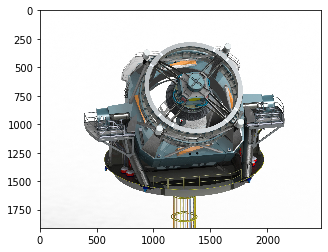

In [121]:
plt.imshow(image)

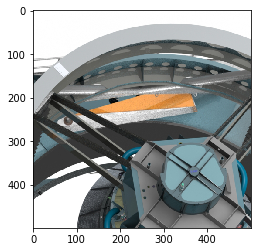

In [122]:
# Zooming in can be done by displaying a fraction of the
# underlying array (a.k.a. cropping)
plt.imshow(image[250:750, 1000:1500])

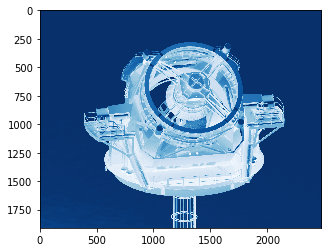

In [123]:
# Display a single color channel using a meaningful colormap
RED, GREEN, BLUE = 0, 1, 2
colormaps = {RED: 'Reds', GREEN: 'Greens', BLUE: 'Blues'}

channel = BLUE
plt.imshow(image[:, :, channel], cmap=colormaps[channel])

-------------
## Acknowledgements
<a id='Acknowledgements'></a>

These are the sources this notebook draws ideas, inspiration and sometimes material from. You are encouraged to consult them to deep further:

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jave VanderPlas (highly recommended book)
* Python Bootcamp organised by the [Berkeley Institute for Data Science (BIDS)](https://bids.berkeley.edu) in the Fall 2016: [videos](https://bids.berkeley.edu/news/python-boot-camp-fall-2016-training-videos-available-online) and [notebooks](https://github.com/profjsb/python-bootcamp)

If you are new to Python, the [HEP Software Foundation](https://hsf-training.github.io/analysis-essentials/)'s [Python Starter Kit](https://hsf-training.github.io/analysis-essentials/) may help you getting familiar with the tools used in a science experiment for analysing data.

The book, [Fluent Python](https://github.com/fluentpython) by Luciano Ramalho is an excellent source when you are more comfortable with Python.